In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Data Statistics

In [3]:
df_train.head()

,id,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,reservation_status
0,0,Resort Hotel,312,2017,March,10,5,2,5,2,...,A,0,No Deposit,298.0,NaN,0,Transient-Party,56.0,0,0
1,1,City Hotel,2,2015,December,51,18,0,2,2,...,D,1,No Deposit,9.0,NaN,0,Transient,97.0,0,1
2,2,City Hotel,41,2016,March,14,31,0,3,2,...,A,0,No Deposit,9.0,NaN,0,Transient,117.9,0,1
3,3,Resort Hotel,228,2016,August,36,29,2,5,2,...,D,0,No Deposit,175.0,NaN,0,Transient,86.4,0,1
4,4,City Hotel,128,2017,May,19,13,0,1,3,...,A,0,No Deposit,9.0,NaN,0,Transient,144.0,0,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75636 entries, 0 to 75635
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75636 non-null  int64  
 1   hotel                           75636 non-null  object 
 2   lead_time                       75636 non-null  int64  
 3   arrival_date_year               75636 non-null  int64  
 4   arrival_date_month              75636 non-null  object 
 5   arrival_date_week_number        75636 non-null  int64  
 6   arrival_date_day_of_month       75636 non-null  int64  
 7   stays_in_weekend_nights         75636 non-null  int64  
 8   stays_in_week_nights            75636 non-null  int64  
 9   adults                          75636 non-null  int64  
 10  children                        75633 non-null  float64
 11  babies                          75636 non-null  int64  
 12  meal                            

In [5]:
df_train.describe()

,id,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,reservation_status
count,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75633.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,65369.000000,4287.000000,75636.000000,75636.000000,75636.000000,75636.000000
mean,37817.500000,104.216841,2016.158351,27.191509,15.782921,0.929531,2.506650,1.856946,0.103764,0.007563,0.031361,0.086348,0.139999,0.221046,86.723172,189.899697,2.316146,101.932624,0.062602,0.636046
std,21834.376817,106.797344,0.706349,13.618039,8.770960,1.002940,1.923848,0.564948,0.396923,0.093249,0.174292,0.838637,1.525138,0.648692,110.755189,132.540272,17.523782,51.928827,0.245124,0.481139
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18908.750000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.000000,0.000000,0.000000
50%,37817.500000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,1.000000
75%,56726.250000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,274.000000,0.000000,126.000000,0.000000,1.000000
max,75635.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,1.000000


In [6]:
df_train['reservation_status'].value_counts()

reservation_status
1    48108
0    27528
Name: count, dtype: int64

In [7]:
df_train.isna().sum()

id                                    0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             325
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10267
company                           71349


In [8]:
df_train.nunique()

id                                75636
hotel                                 2
lead_time                           474
arrival_date_year                     3
arrival_date_month                   12
arrival_date_week_number             53
arrival_date_day_of_month            31
stays_in_weekend_nights              17
stays_in_week_nights                 34
adults                               11
children                              4
babies                                4
meal                                  5
country                             164
market_segment                        8
distribution_channel                  5
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       61
reserved_room_type                   10
assigned_room_type                   11
booking_changes                      20
deposit_type                          3
agent                               310
company                             318


# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution by Hotel

hotel
City Hotel      50262
Resort Hotel    25374
Name: count, dtype: int64


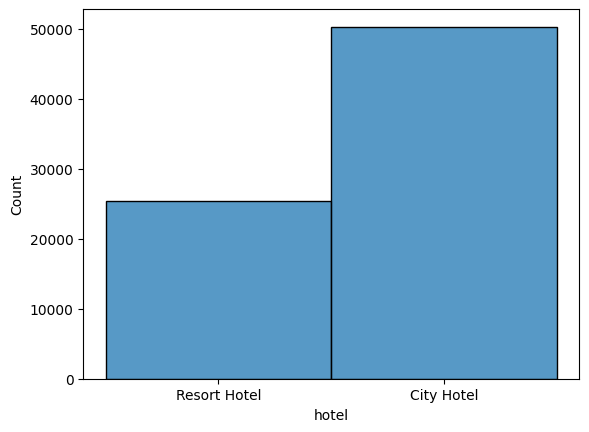

In [10]:
sns.histplot(data=df_train['hotel'])
print(df_train['hotel'].value_counts())

# Distribution by Reservation Status

reservation_status
1    48108
0    27528
Name: count, dtype: int64


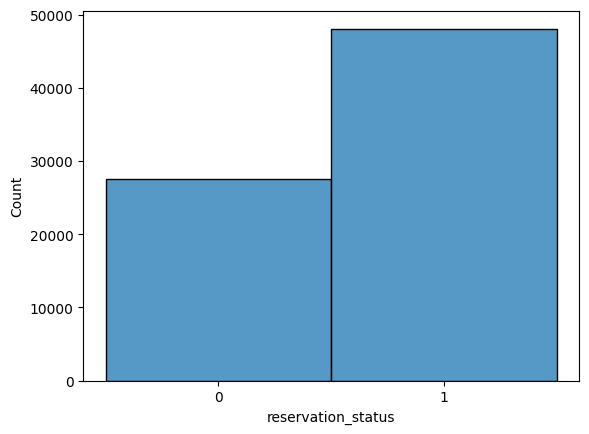

In [24]:
str_train = df_train.copy()
str_train.drop("id",axis=1,inplace=True)
str_train['reservation_status'] = str_train['reservation_status'].astype("string")
sns.histplot(data=str_train,x="reservation_status",bins=2,discrete=True)
print(df_train['reservation_status'].value_counts())

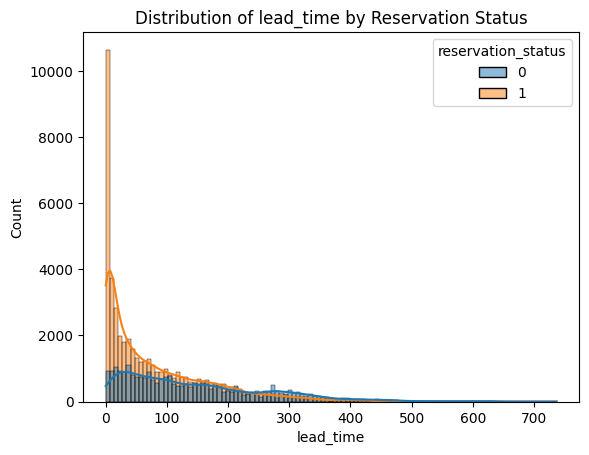

In [25]:
col = 'lead_time'
plt.figure()
sns.histplot(data=str_train, x=col,hue='reservation_status',kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.show()

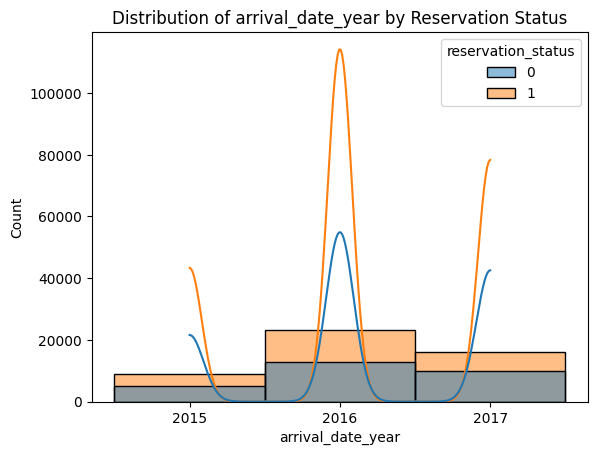

In [37]:
col = 'arrival_date_year'
year_order = ['2015','2016','2017']
str_train[col] = pd.Categorical(str_train[col], categories=year_order, ordered=True)
plt.figure()
sns.histplot(data=str_train, x=col,bins=3,discrete=True,hue='reservation_status',kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.show()

In [41]:
for i in year_order:
    print(f'{i} reservation distribution : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()}')
    print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')

2015 reservation distribution : reservation_status
1    8836
0    4992
Name: count, dtype: Int64
2015 success rate : 63.90%
2016 reservation distribution : reservation_status
1    23303
0    12700
Name: count, dtype: Int64
2016 success rate : 64.73%
2017 reservation distribution : reservation_status
1    15969
0     9836
Name: count, dtype: Int64
2017 success rate : 61.88%


C:\Users\jason\AppData\Local\Temp\ipykernel_3420\3331307246.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')
C:\Users\jason\AppData\Local\Temp\ipykernel_3420\3331307246.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')
C:\Users\jason\AppData\Local\Temp\ipyker

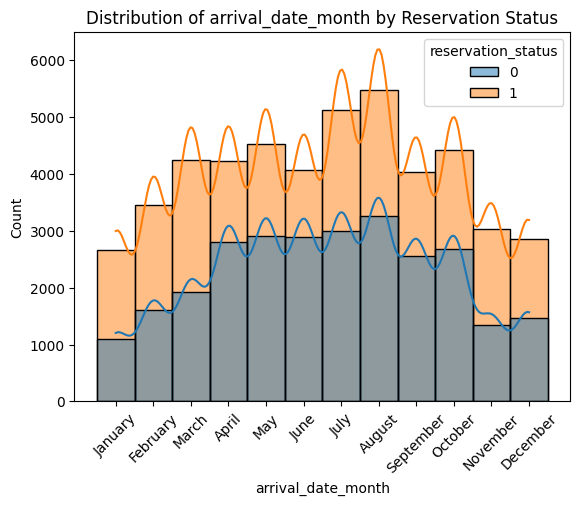

In [36]:
col = 'arrival_date_month'
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
str_train[col] = pd.Categorical(str_train[col], categories=month_order, ordered=True)

# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True, bins=len(month_order))
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
str_train.drop("id",inplace=True,axis=1)

In [ ]:
str_train = str_train.ffill()

In [ ]:
str_train = pd.DataFrame({col: str_train[col].astype('category').cat.codes for col in str_train}, index=str_train.index)

In [ ]:
str_train['reservation_status'].value_counts()

# Modelling

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_1 = CatBoostClassifier()

In [ ]:
cat_1.fit(str_train.drop("reservation_status",axis=1),str_train['reservation_status'])

# Predict

In [ ]:
test = df_test.drop("id",axis=1)

In [ ]:
test = pd.DataFrame({col: test[col].astype('category').cat.codes for col in test}, index=test.index)

In [ ]:
preds = cat_1.predict(test)

In [ ]:
preds.mean()

In [ ]:
fin = pd.DataFrame({'id': df_test.id, 'reservation_status': preds})
fin.to_csv('sub.csv',index=False)